# XGBoost算法
XGBoost 是梯度提升算法的一种高效实现，它在传统梯度提升的基础上进行了许多优化，如使用二阶泰勒展开来近似损失函数、支持正则化防止过拟合、支持并行计算等。

准确率: 1.0000
分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


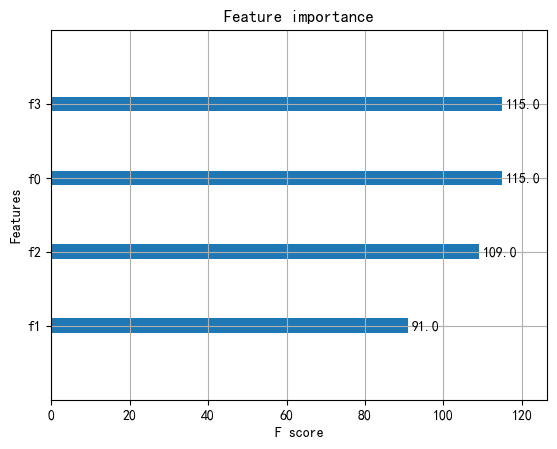

In [4]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. 加载数据集
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 2. 划分训练集和测试集
# 将数据集按 80:20 的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 转换数据为 DMatrix 格式
# XGBoost 提供了 DMatrix 数据结构，它能更高效地处理数据
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# 4. 设置 XGBoost 模型参数
params = {
    'objective': 'multi:softmax',  # 多分类任务，使用 softmax 函数输出类别概率
    'num_class': 3,  # 类别数量，鸢尾花数据集有 3 个类别
    'eval_metric': 'merror',  # 评估指标使用多分类错误率
    'max_depth': 6,  # 树的最大深度，用于控制树的复杂度，防止过拟合
    'eta': 0.3,  # 学习率，控制每次迭代的步长
    'subsample': 0.8,  # 样本采样比例，用于减少过拟合
    'colsample_bytree': 0.8  # 特征采样比例，用于减少过拟合
}

# 5. 训练 XGBoost 模型
# 训练 100 轮
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 6. 在测试集上进行预测
y_pred = model.predict(dtest)

# 7. 计算评估指标
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.4f}")

# 打印分类报告，包含精确率、召回率、F1 值等信息
print("分类报告:")
print(classification_report(y_test, y_pred))

# 8. 可视化特征重要性
# 绘制特征重要性图
xgb.plot_importance(model)
plt.show()

## 回归任务

均方误差 (MSE): 5118.4424
均方根误差 (RMSE): 71.5433


C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


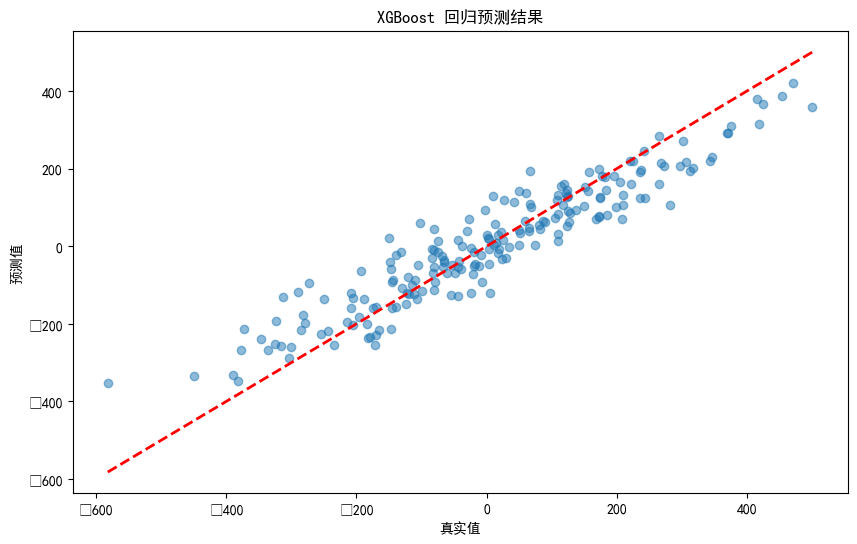

In [3]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 生成示例回归数据
# 使用 make_regression 函数生成包含 1000 个样本、20 个特征（其中 10 个为有效特征）的回归数据集
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)

# 2. 划分训练集和测试集
# 将数据集按 80:20 的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 转换数据为 DMatrix 格式
# XGBoost 提供了 DMatrix 数据结构，它能更高效地处理数据
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# 中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# 4. 设置 XGBoost 模型参数
params = {
    'objective': 'reg:squarederror',  # 回归任务使用均方误差作为目标函数
    'eval_metric': 'rmse',  # 评估指标使用均方根误差
    'max_depth': 6,  # 树的最大深度，用于控制树的复杂度，防止过拟合
    'eta': 0.3,  # 学习率，控制每次迭代的步长
    'subsample': 0.8,  # 样本采样比例，用于减少过拟合
    'colsample_bytree': 0.8  # 特征采样比例，用于减少过拟合
}

# 5. 训练 XGBoost 模型
# 训练 100 轮
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 6. 在测试集上进行预测
y_pred = model.predict(dtest)

# 7. 计算评估指标
# 计算均方误差和均方根误差
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")

# 8. 结果可视化
# 绘制预测值和真实值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('XGBoost 回归预测结果')
plt.show()